In [1]:
import sys
sys.path.insert(1, '../../..')

In [6]:
from medicine.flask_app import db
from medicine.models.medicine import Medicine
from medicine.models.alias import Alias
from collections import Counter

In [3]:
content = ''

with open('../data/本草纲目(簡體).txt', 'r', encoding='utf8') as file:
    for line in file:
        content += line
content[0:20]

'<篇名>本草纲目\n书名：本草纲目\n作者：'

In [7]:
m = Medicine.query.all()
print(m[3].alias)

[Alias('膏露'), Alias('瑞露'), Alias('天酒'), Alias('神漿')]


In [8]:
joindata = db.session.query(Medicine.name, Alias.name).outerjoin(Alias).all()
joindata[0:5]

[('《名醫别錄》', None),
 ('《本草拾遺》', None),
 ('《本草綱目》', None),
 ('《神農本經》', None),
 ('KT蒿', '莪蒿')]

In [9]:
keys = set([item[0] for item in joindata])
data_dict = dict()

for k in keys:
    v = [item[1] for item in joindata if item[0] == k]
    v = v if v[0] is not None else []
    data_dict[k] = v

dict(list(data_dict.items())[0:3])

{'水仙': ['金盞銀台'], '赤龍浴水': [], '鍋蓋': []}

In [10]:
medicines = []

for k, v in data_dict.items():
    v = v.copy()
    v.append(k)
    medicines.extend(v)
medicines[0:5]

['鍋蓋', '金盞銀台', '水仙', '赤龍浴水', '赤珠']

In [11]:
import numpy as np
import pandas as pd

df = pd.DataFrame(medicines, columns=["item"])
# df.to_csv('./jieba_data/userdict.txt', header=None, index=None, sep=' ', mode='a')

In [13]:
import re
import jieba

jieba.set_dictionary('../jieba_data/dict.txt.big')
jieba.load_userdict('../jieba_data/userdict.txt')

Building prefix dict from D:\TMU_BigData\0.專題\程式\project(medicine)\medicine\medicine\test\jieba_data\dict.txt.big ...
Dumping model to file cache C:\Users\leoch\AppData\Local\Temp\jieba.u74bff60d95b469fcc55ef85938850064.cache
Loading model cost 1.463 seconds.
Prefix dict has been built succesfully.


In [15]:
signs = ''
with open('../jieba_data/punctuation.txt', encoding='utf-8') as f:
    signs = f.readlines()
    signs = [sign.strip() for sign in signs] 

signs_str = '|'.join(signs)
signs_str = re.sub('(\[|\])', r'\\\1', signs_str)
signs_str

'\\[|.|!|/|-|>|<|$|%|^|*|"|?|\\]|||\\[|—|！|，|。|？|、|（|）|：|」|「|)|(|【|】|╱|；|\\]|=|「|」|‧|（|）|.|~|《|》|∶'

In [16]:
lines = re.split(',|，|。|;|【|】|\n|\u3000', content)
lines = [re.sub('['+signs_str+']', ' ', line).strip() for line in lines]
lines = [line for line in lines if line.strip() != '']

In [17]:
len(lines)
# lines

282168

In [18]:
cut_result = []
for line in lines:
    cut_list = jieba.cut(line, cut_all=False)
    cut_result.extend(cut_list)
len(cut_result)

955741

In [19]:
cut_result = []
cut_list = jieba.cut(content, cut_all=False)
cut_result.extend(cut_list)


In [ ]:
# cut_result

In [20]:
from collections import Counter

count_dict = Counter(cut_result)

In [21]:
medicine_count = dict()

for k, v in data_dict.items():
    v = v.copy()
    v.append(k)
    medicine_count[k] = [{k:count_dict[k]} for k in v]
    
# medicine_count

In [22]:
wc_content_list = []
wc_content = ''

for k, v in data_dict.items():
    v = v.copy()
    v.append(k)
    num_list = [count_dict[k] for k in v]
    num = sum(num_list)
    wc_content_list.extend([k] * num)
        
    
wc_content = ' '.join(wc_content_list)
# wc_content

In [23]:
from PIL import Image
from path import Path as path
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [25]:
img_mask = np.array(Image.open('../data/李時珍.jpg'))
font = r'C:/Windows/Fonts/msjh.ttc'

wc = WordCloud(background_color=None,
               mode='RGBA',
               mask=img_mask,
               collocations=False,
               font_path=font,
               width=400,
               height=200,
               margin=2)

wc.generate(wc_content)


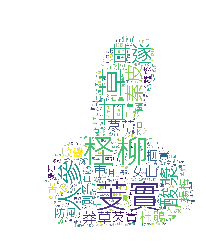

In [26]:
plt.imshow(wc)
plt.axis("off")
plt.show()

In [27]:
wc.to_file('./wordcloud.png')

In [ ]:
medicine_count

In [ ]:
totle = len(wc_content_list)
temp = Counter(wc_content_list)
temp.most_common(5)


In [ ]:
1311/totle